In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from sklearn.preprocessing import LabelEncoder,StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import plotly.graph_objs as go
import plotly.offline as py

from warnings import filterwarnings
filterwarnings('ignore')#ignore warning messages 
import warnings as wrn
wrn.filterwarnings('ignore',category=DeprecationWarning)
wrn.filterwarnings('ignore',category=FutureWarning)
wrn.filterwarnings('ignore',category=UserWarning)

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('/kaggle/input/marketsegmentcluster/marketing_campaign.csv',sep='\t')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [6]:
df.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

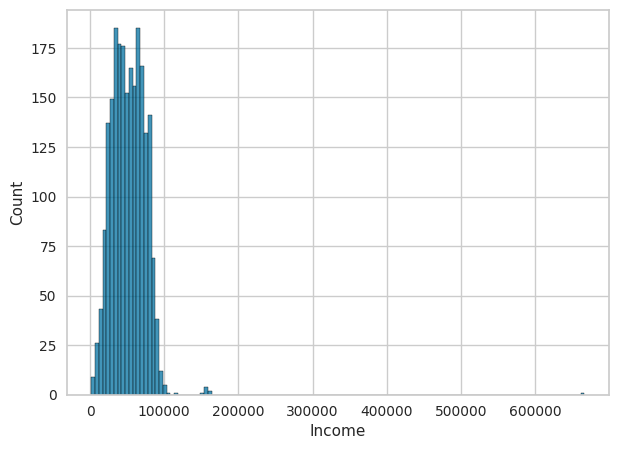

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df["Income"]);

In [10]:
df=df.dropna()

In [11]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.shape

(2216, 29)

In [13]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [14]:
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
df['Customer_For']=days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

# Feature Engineering;

In [15]:
df['Age']=2024-df['Year_Birth']
df['Spent']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df['Living_With']=df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone',})


df['Children']=df['Kidhome']+df['Teenhome']

df['Family_Size']=df['Living_With'].replace({'Alone':1,'Partner':2}) +df['Children']


df['Is_Parent']=np.where(df.Children>0,1,0)

df['Education']=df['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
#Dropping some of the redundant features
df=df.drop(to_drop,axis=1)

In [16]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57283200000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,9763200000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,26956800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,12009600000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,13910400000000000,43,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,32918400000000000,57,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1641600000000000,78,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,13392000000000000,43,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,13478400000000000,68,843,Partner,1,3,1


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Kidhome,2216.0,4.417870e-01,5.368962e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Teenhome,2216.0,5.054152e-01,5.441812e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Recency,2216.0,4.901264e+01,2.894835e+01,0.0,2.400000e+01,4.900000e+01,7.400000e+01,9.900000e+01
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02


<Figure size 2500x1000 with 0 Axes>

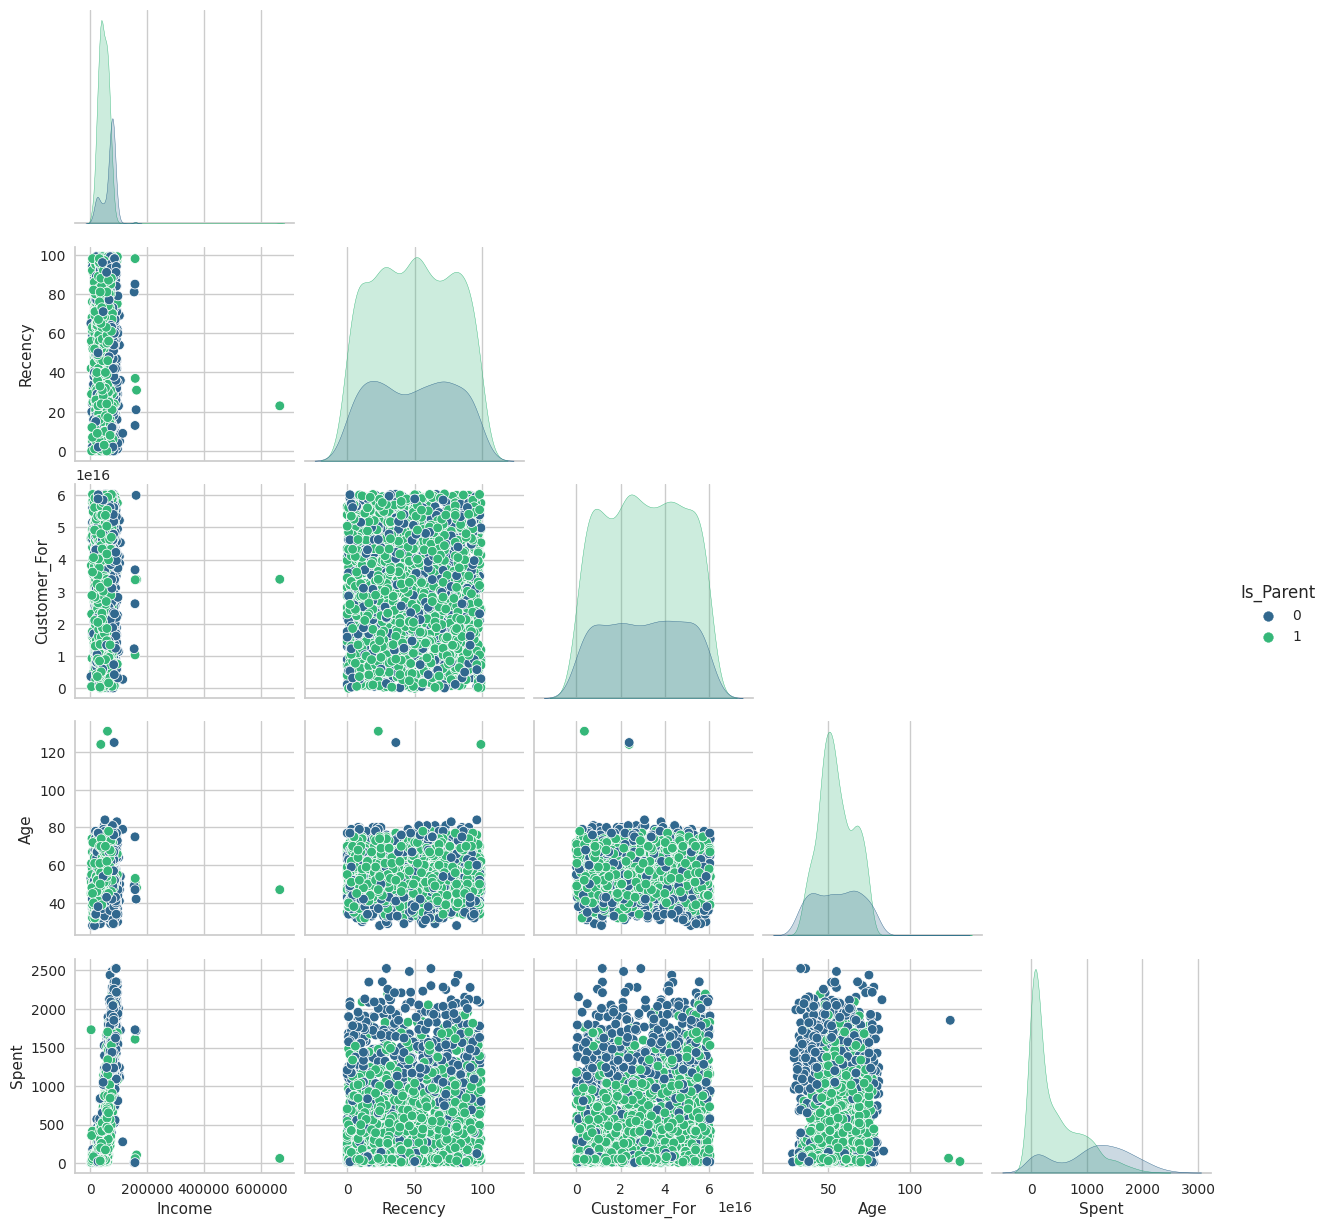

In [18]:
# pairplot for se columns;
to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure(figsize=(25,10))
ax=sns.pairplot(df[to_plot],hue='Is_Parent',palette='viridis',corner=True)
plt.show()

In [19]:
#Dropping the outliers by setting a cap on Age and income;
df=df[(df['Age']<90)]
df=df[(df['Income']<600000)]

In [20]:
df.shape

(2212, 30)

In [21]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [22]:
cor=['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent']


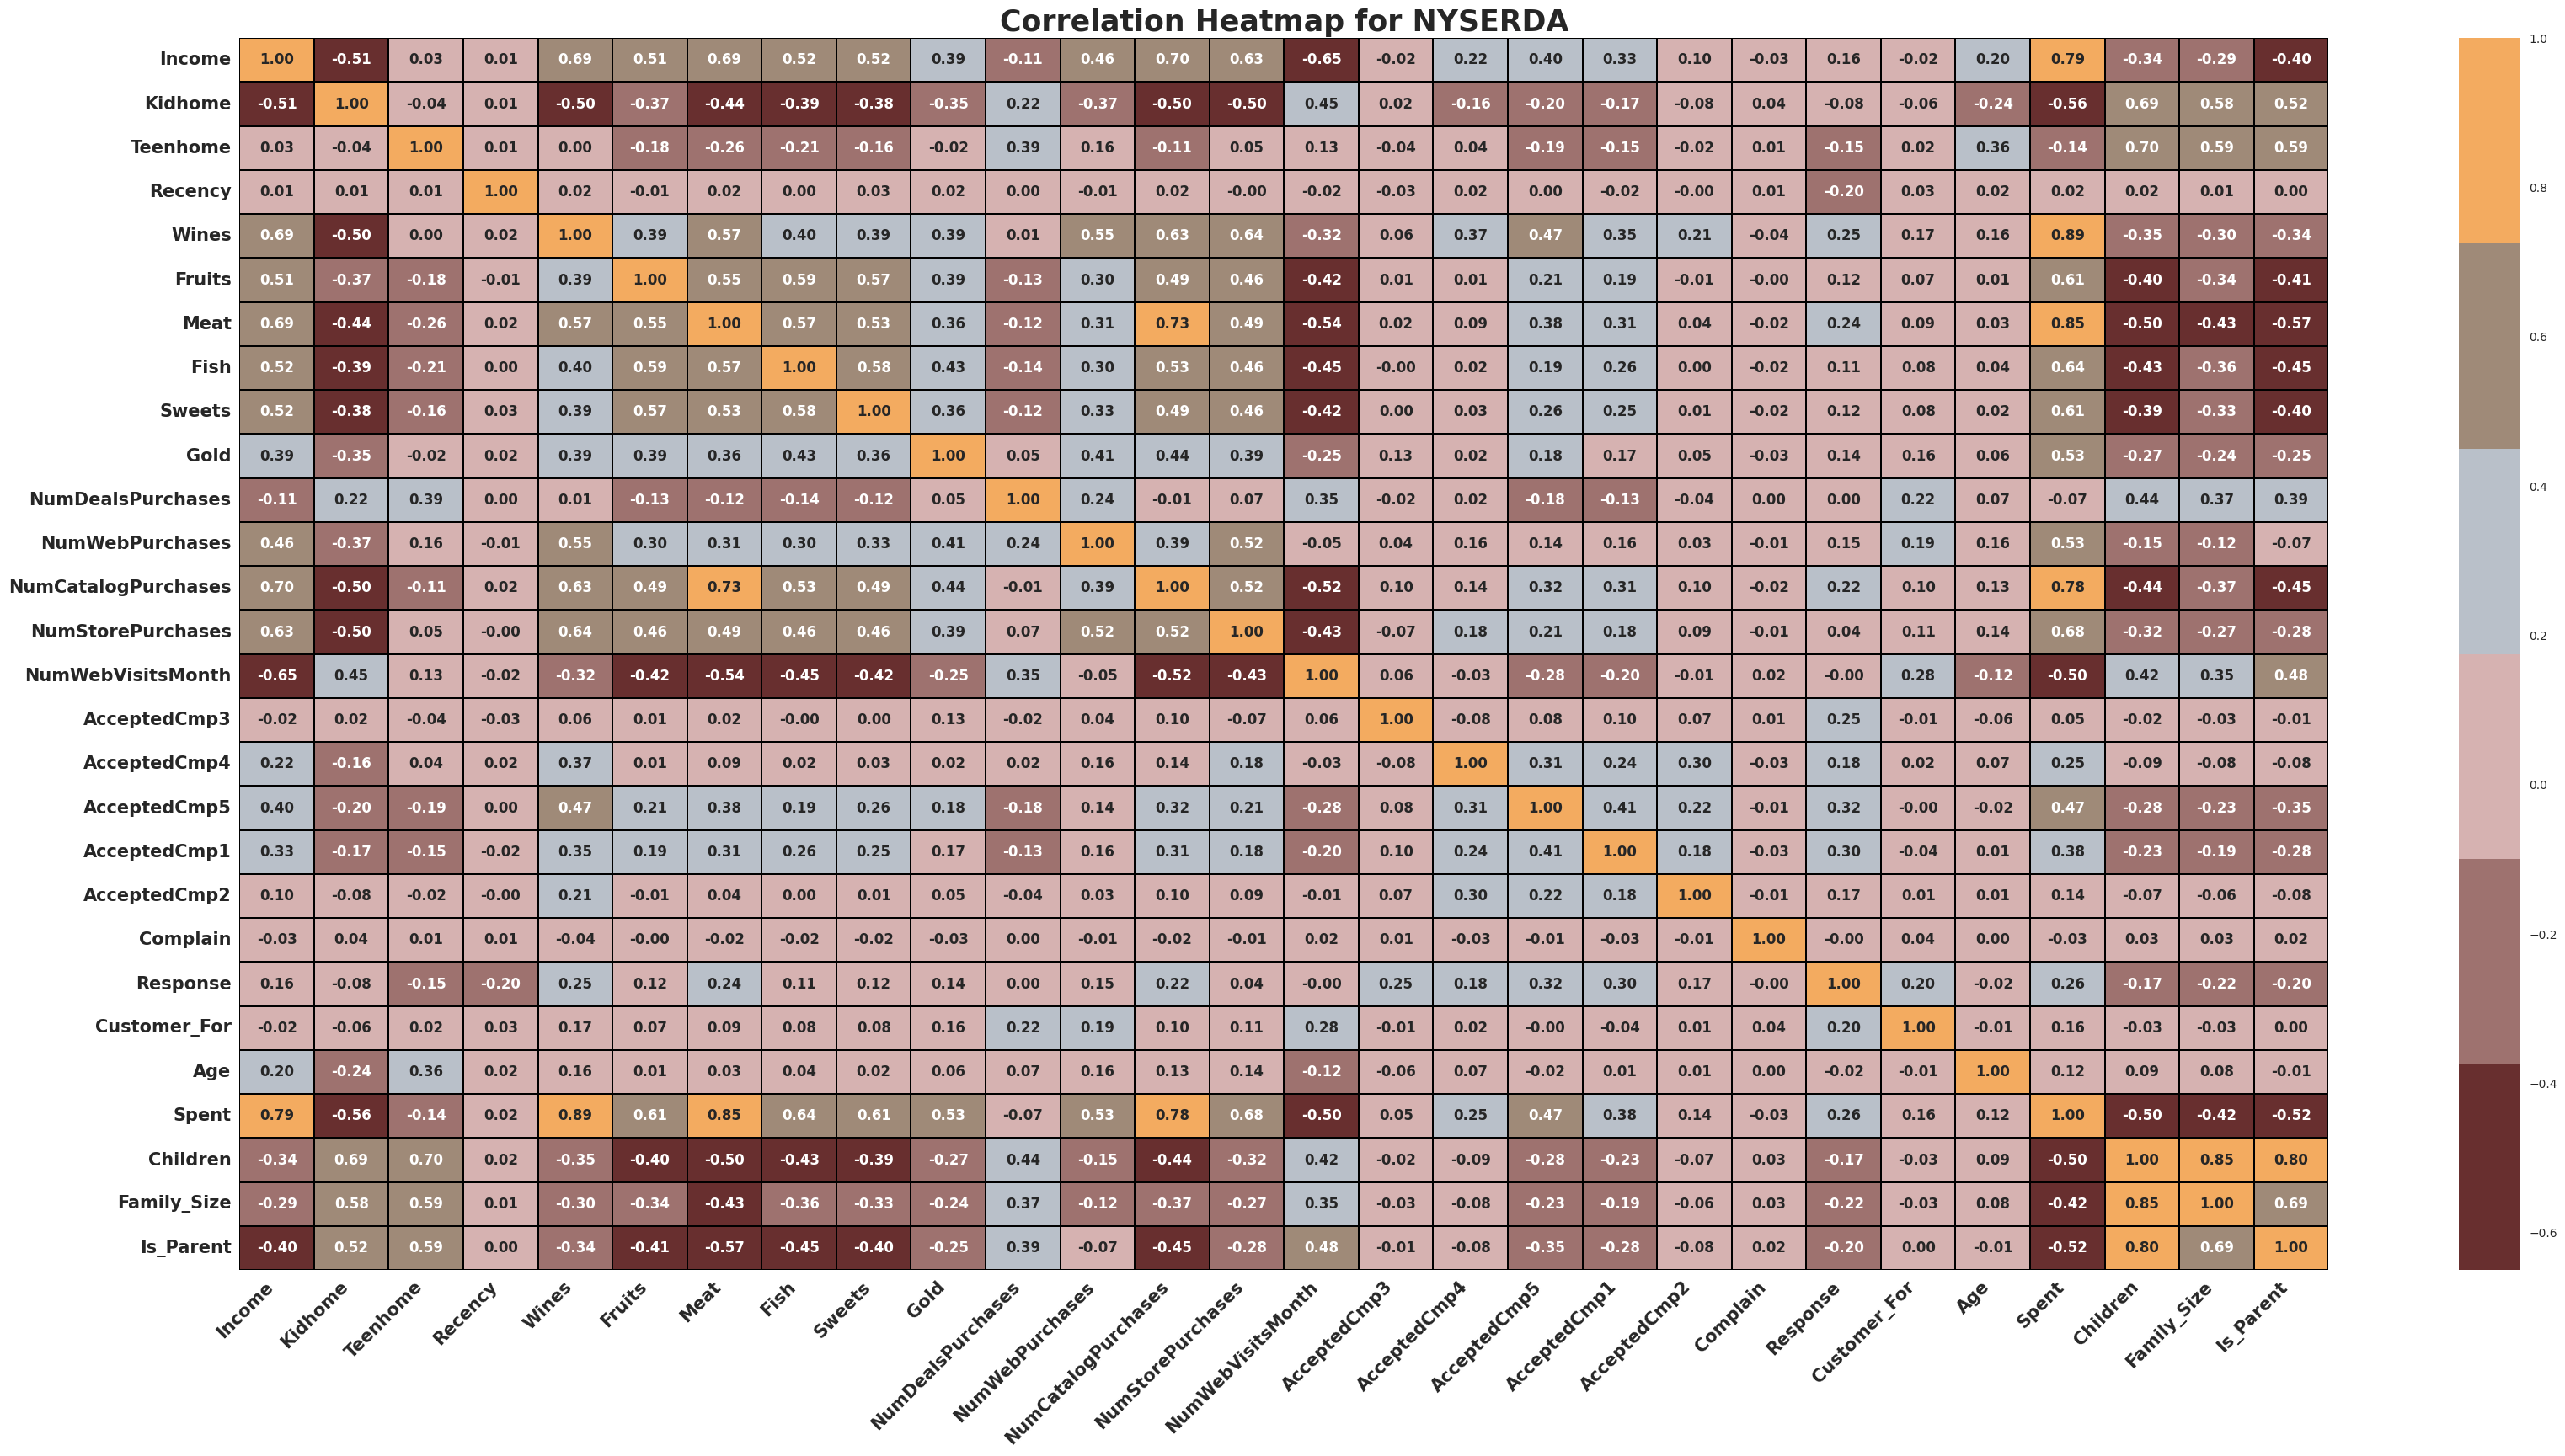

In [23]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
# Heatmap of data
plt.figure(figsize=(40,19))
ax=sns.heatmap(df[cor].corr(), annot=True,fmt='.2f',linewidths=0.3,linecolor='black', cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right',fontsize=15,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15,fontweight='bold')

# Annotasyon (sayı) değerlerinin özelleştirilmesi
for text in ax.texts:
    text.set_size(12)
    text.set_weight('bold')
plt.title('Correlation Heatmap for NYSERDA',fontsize=25,fontweight='bold');

In [24]:
hc_complete=linkage(df[cor],'complete')# bunlar dendoğram kurmaya çalışalım
hc_average=linkage(df[cor],'average')#burada hiyerarşik küme oluşturuldu

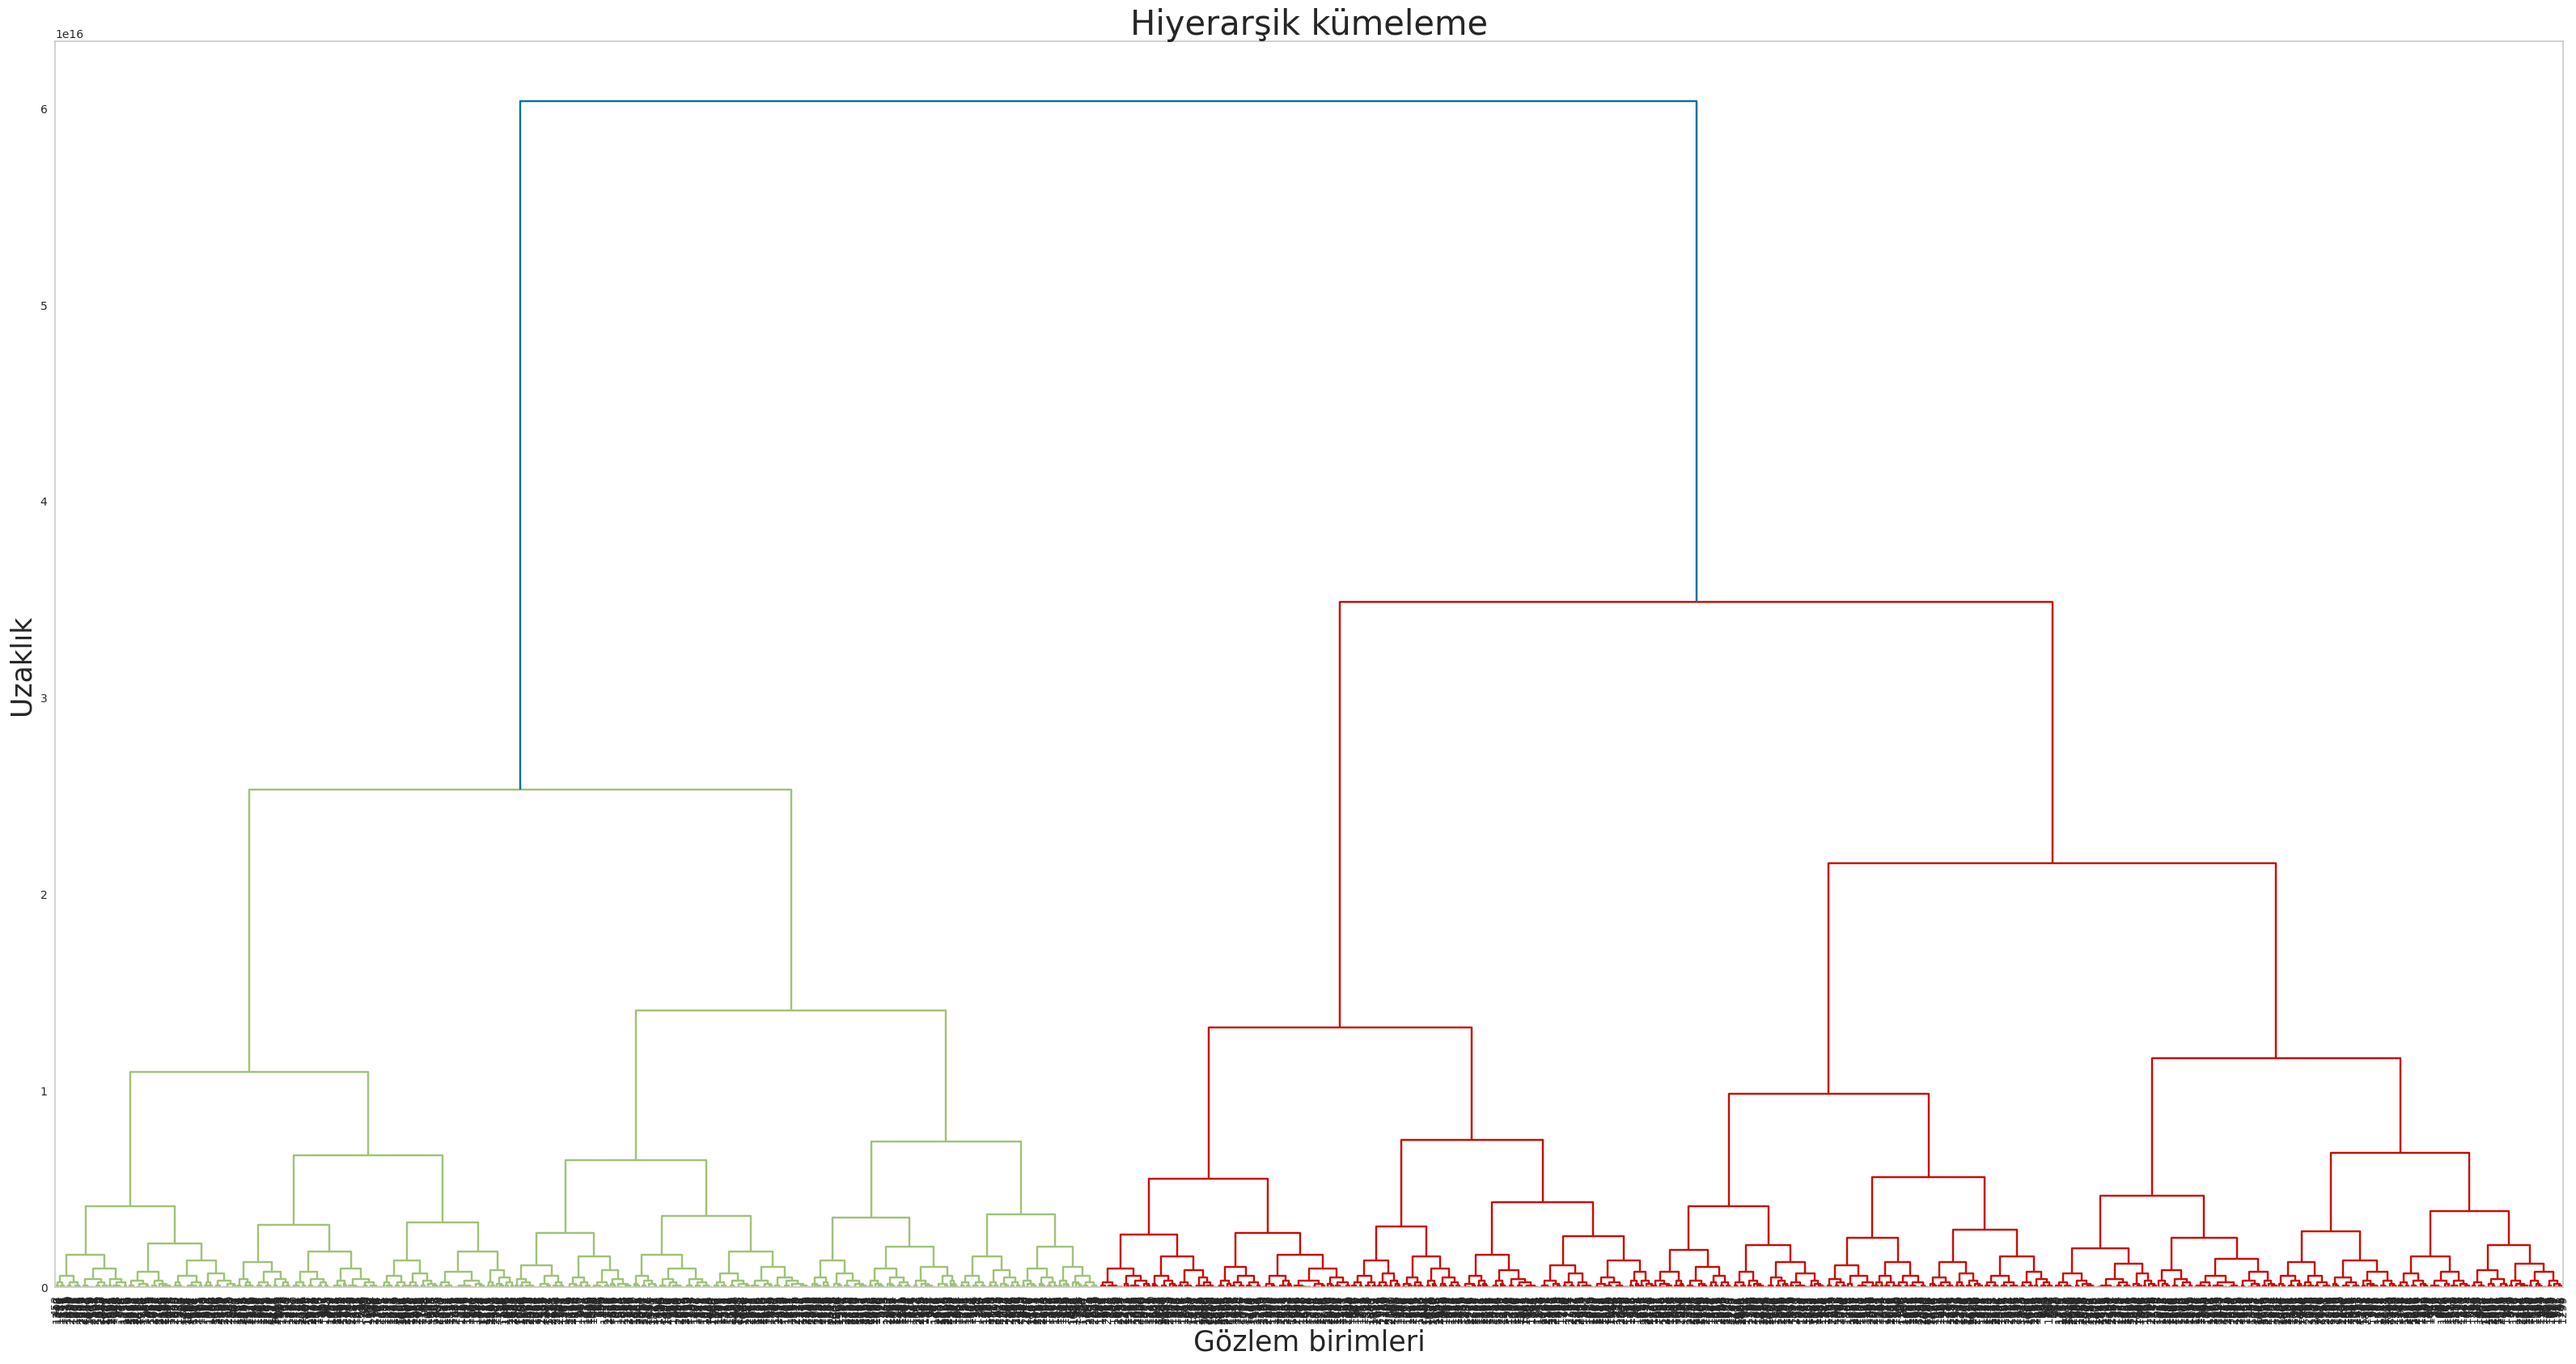

In [25]:
plt.figure(figsize=(40,20))
plt.title('Hiyerarşik kümeleme',fontsize=30)
plt.xlabel('Gözlem birimleri',fontsize=25)
plt.grid()
plt.ylabel('Uzaklık',fontsize=25)
dendrogram(hc_complete,
          leaf_font_size=10);
#dendrogram(hc_average,
#          leaf_font_size=10);

# DATA PREPROCESSING;

In [29]:
# Kategorik değişkenlerin listesini alın;
s=(df.dtypes=='object')
object_cols=list(s[s].index)
object_cols

[]

In [30]:
#Label Encoding the object dtypes;

le=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(le.fit_transform)

print("All features are now numerical")

All features are now numerical


In [31]:

ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
ds = ds.select_dtypes(include=['int64', 'float64'])
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [32]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


In [33]:
pca=PCA(n_components=3)
pca.fit(scaled_ds)
Pca_ds=pd.DataFrame(pca.transform(scaled_ds),columns=['col1','col2','col3'])

In [34]:
Pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,0.000000e+00,2.878602,-5.978122,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,5.139550e-17,1.709469,-4.194756,-1.323834,-0.173643,1.234861,6.167991
col3,2212.0,1.003818e-17,1.231681,-3.622562,-0.855390,-0.051897,0.864181,6.743378


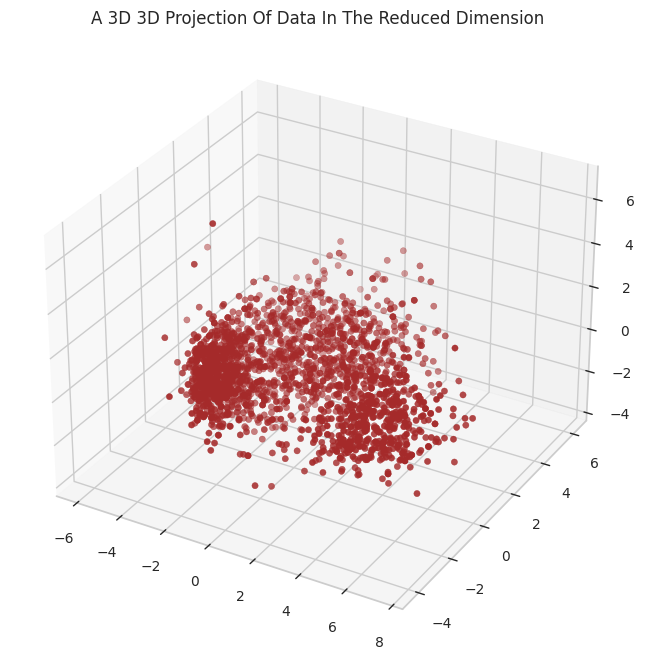

In [35]:
x=Pca_ds['col1']
y=Pca_ds['col2']
z=Pca_ds['col3']
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c='brown',marker='o')
ax.set_title('A 3D 3D Projection Of Data In The Reduced Dimension')
plt.show()

# CLUSTERING;

Elbow Method to determine the number of clusters to be formed:


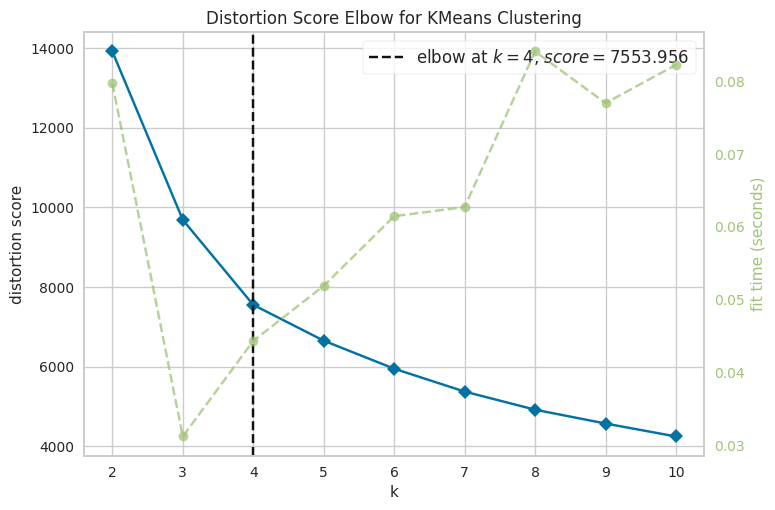

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(Pca_ds)
Elbow_M.show()

In [37]:
pca.explained_variance_ratio_

array([0.36011321, 0.12699843, 0.06592692])

In [38]:
#Initiating the Agglomerative Clustering model 
AC=AgglomerativeClustering(n_clusters=4)
yhat_Ac=AC.fit_predict(Pca_ds)

Pca_ds['Cluster']=yhat_Ac
df['Cluster']=yhat_Ac


In [39]:
AC.labels_

array([2, 3, 2, ..., 2, 0, 3])

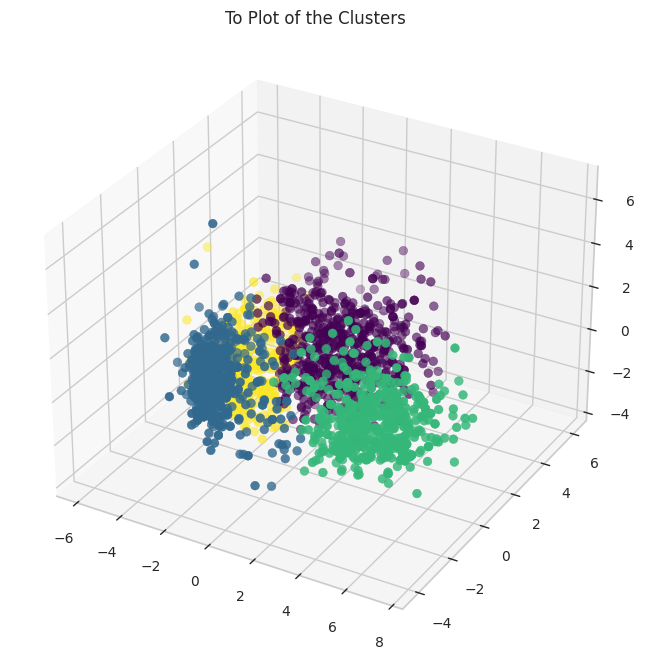

In [40]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=Pca_ds['Cluster'],marker='o',cmap='viridis')
ax.set_title('To Plot of the Clusters ')
plt.show()

In [42]:

import plotly.graph_objs as go
import pandas as pd

# Plotly ile 3D Scatter Plot
# Not: Pca_ds DataFrame'inizi ve Cluster sütununuzu zaten hazırladığınızı varsayıyorum.

trace = go.Scatter3d(
    x=Pca_ds['col1'],  # x koordinatı
    y=Pca_ds['col2'],  # y koordinatı
    z=Pca_ds['col3'],  # z koordinatı
    mode='markers',
    marker=dict(
        size=5,  # İlk örnekte size belirtilmemiş, ikincisinde 40 olarak belirtilmiş. Size'ı burada ayarlayabilirsiniz.
        color=Pca_ds['Cluster'],  # Noktaları Cluster'a göre renklendir
        colorscale='Viridis',  # Renk paleti
        opacity=0.7  # Saydamlık
        
    ),
    text=Pca_ds['Cluster'],  # Her noktanın yanında gösterilecek kümelerin etiket numarası
    hoverinfo=f'x+y+z +text'  # İmleci bir noktanın üzerine getirdiğinizde gösterilecek bilgiler
    
)

# Verileri ve düzeni bir figürde birleştirin
layout = go.Layout(
    title='Clusters Plot',
    scene=dict(
        xaxis=dict(title='col1'),
        yaxis=dict(title='col2'),
        zaxis=dict(title='col3')
    ),
    
    margin=dict(l=0, r=0, b=0, t=0)  # Grafik kenar boşluklarını ayarlayın
    
)

fig = go.Figure(data=[trace], layout=layout)

fig.show()



# MODEL DEĞERLENDİRME; 

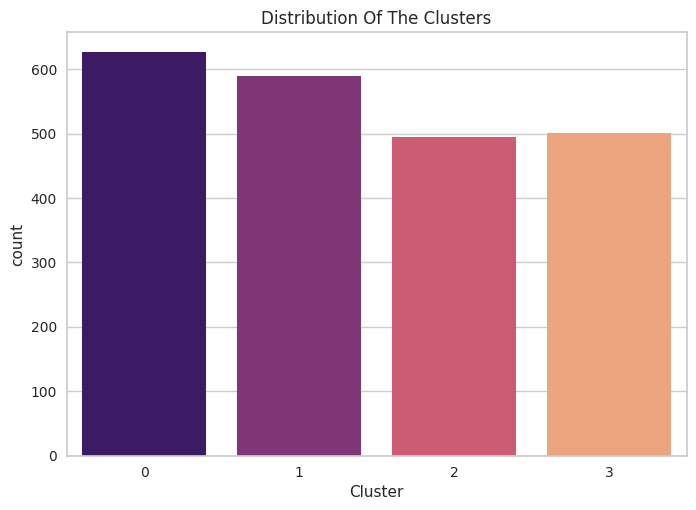

In [43]:
pl=sns.countplot(x=df['Cluster'],palette='magma')
pl.set_title('Distribution Of The Clusters')
plt.show()

In [44]:
df[df['Cluster']==3]

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,9763200000000000,70,27,0,2,3,1,3
9,1,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,9331200000000000,74,49,1,2,4,1,3
13,1,59354.0,1,1,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,0,19526400000000000,72,310,0,2,3,1,3
16,0,41850.0,1,1,51,53,5,19,2,13,4,3,3,0,3,8,0,0,0,0,0,0,0,47692800000000000,44,96,1,2,4,1,3
26,0,53359.0,1,1,4,173,4,30,3,6,41,4,5,1,4,7,0,0,0,0,0,0,0,34387200000000000,48,257,1,2,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0,36807.0,1,1,88,4,2,5,0,0,5,1,1,0,2,6,0,0,0,0,0,0,0,48038400000000000,70,16,1,2,4,1,3
2223,1,33562.0,1,2,33,21,12,12,0,3,3,3,2,0,4,4,0,0,0,0,0,0,0,345600000000000,61,51,1,3,5,1,3
2229,0,24434.0,2,0,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,0,3628800000000000,52,50,1,2,4,1,3
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1641600000000000,78,444,1,3,5,1,3


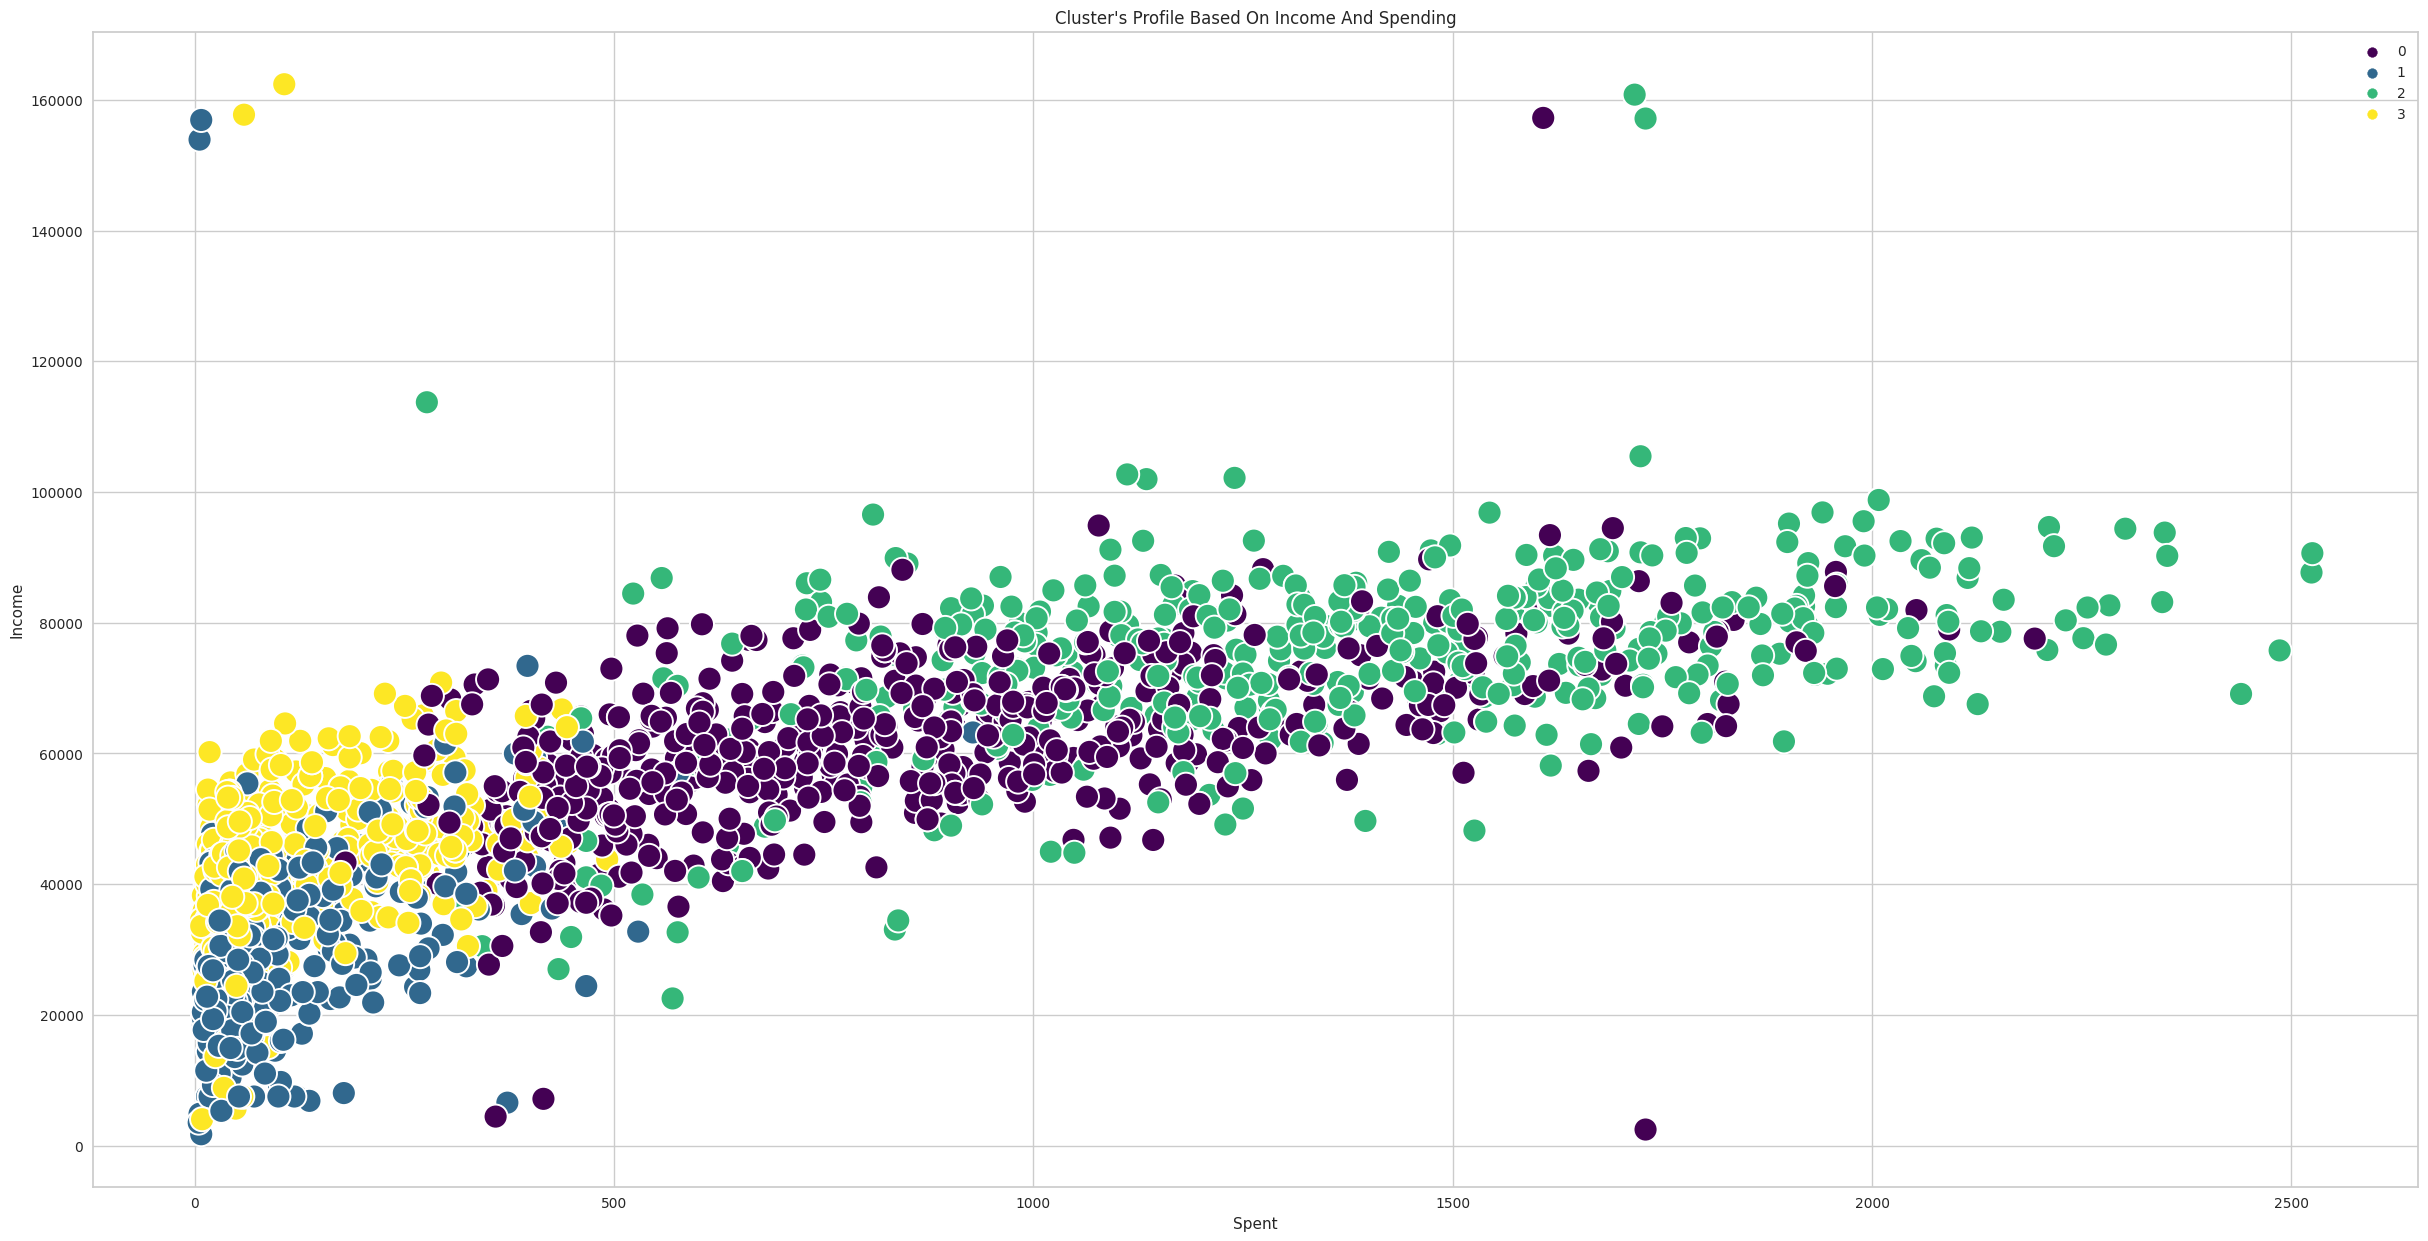

In [45]:
plt.figure(figsize=(30,15))
#plt.scatter(data=df,x=df['Income'],y=df['Spent'],c=df['Cluster'],s=500,cmap='viridis');
pl=sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"], s=300,palette= 'viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
pl.set_xlabel('Spent')
plt.legend()
plt.show()

In [46]:
plt.figure(figsize=(30,25))
# Scatter plot için veri noktalarını oluştur
trace = go.Scatter(
    x=df['Spent'],  # X ekseni değerleri
    y=df['Income'],  # Y ekseni değerleri
    mode='markers',  # Noktaları işaretçilerle göster
    marker=dict(
        size=7,  # İşaretçilerin boyutu
        color=df['Cluster'],  # Her bir noktayı, 'Cluster' sütunundaki değerlere göre renklendir
        colorscale='Viridis',  # Renk skalası
        showscale=True  # Renk skalasını göster
    ),
    text=df['Cluster']  # Her bir nokta için ek bilgi olarak kümeyi göster
)

# Veriyi ve düzeni bir figürde birleştir
data = [trace]
layout = go.Layout(
    title="Cluster's Profile Based On Income And Spending",
    xaxis=dict(title='Spent'),
    yaxis=dict(title='Income'),
    legend=dict(title='Cluster'),
    hovermode='closest',  # En yakın noktaya göre hover bilgilerini göster
    width=1000,  # Genişlik 800 piksel olarak ayarlandı
    height=700  # Yükseklik 600 piksel olarak ayarlandı
)

fig = go.Figure(data=data, layout=layout)

# Figürü göster
py.iplot(fig)

<Figure size 3000x2500 with 0 Axes>

In [47]:
# Plotly Figure ve Scatter3d nesnesi oluştur
fig = go.Figure()

# 'Cluster' değerlerine göre farklı renkler için döngü
for cluster in df['Cluster'].unique():
    df_cluster = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=df_cluster['Spent'],  # x ekseninde harcanan miktar
        y=df_cluster['Income'],  # y ekseninde gelir
        z=df_cluster['Age'],     # z ekseninde yaş veya başka bir 3. boyut
        mode='markers',
        marker=dict(
            size=3,  # Noktaların boyutu
            # Her bir küme için bir renk atayın. 'viridis' renk skalasını kullanmak için Plotly'nin renk paletlerinden yararlanabilirsiniz.
        ),name=f'Cluster {cluster}'  # Her küme için bir iz adı
        
    ))

# Grafik başlığı ve eksen isimlerini ayarlayın
fig.update_layout(
    title="Cluster's Profile Based On Income, Spending, and Age",
    scene=dict(
        xaxis_title='Spent',
        yaxis_title='Income',
        zaxis_title='Age'
    ),
    legend_title="Cluster"
)

# Grafiği göster
fig.show()

## Income vs spending plot shows the clusters pattern

### group 0: high spending & average income
### group 1: high spending & high income
### group 2: low spending & low income
### group 3: high spending & low income
### Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

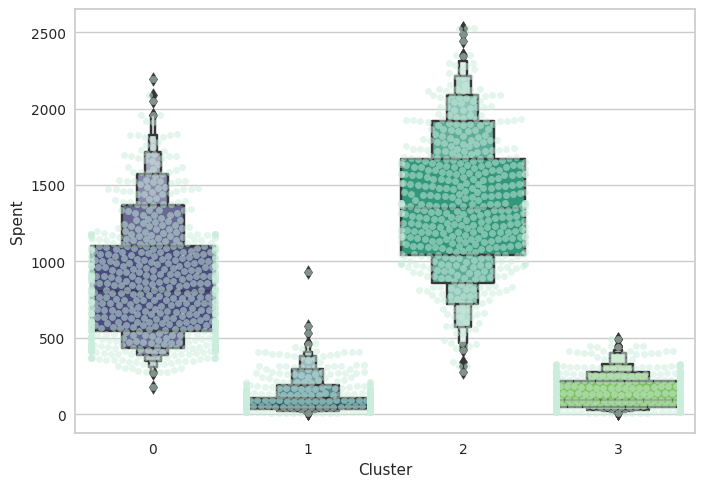

In [48]:
plt.figure()
sns.swarmplot(x=df['Cluster'],y=df['Spent'],color='#CBEDDD',alpha=0.5)
sns.boxenplot(x=df['Cluster'],y=df['Spent'],palette='viridis')
plt.show()

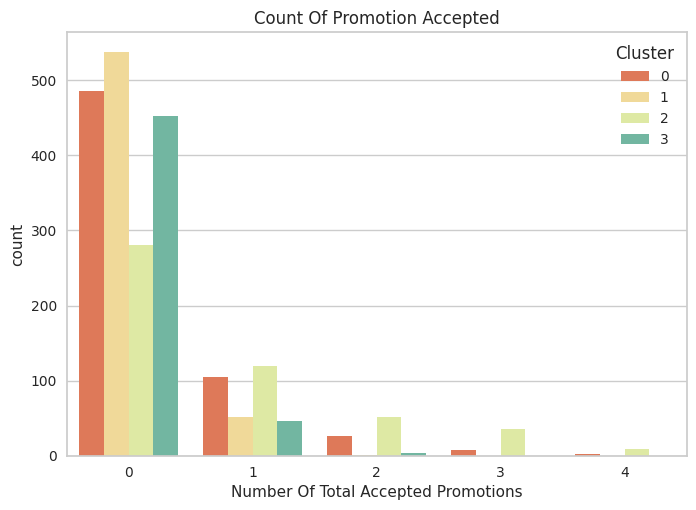

In [49]:
#Kabul edilen promosyonların toplamını almak için bir özellik oluşturma;
df['Total_Promos']=df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Cluster"], palette= 'Spectral')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()


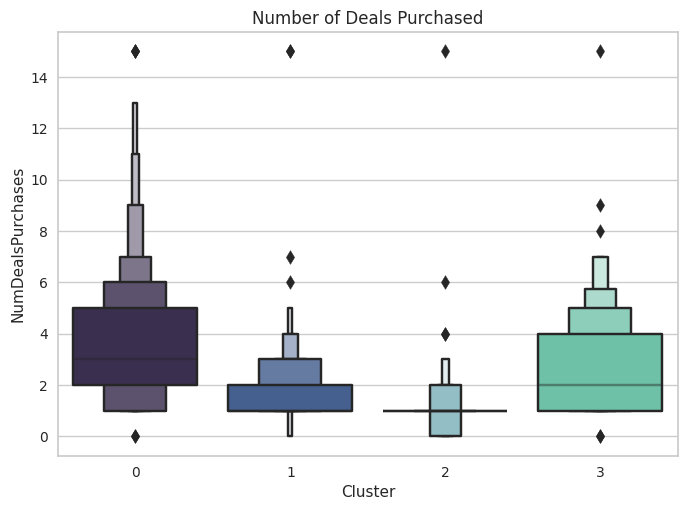

In [50]:
#Satın alınan anlaşma sayısının grafiği;
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster"], palette= 'mako')
pl.set_title("Number of Deals Purchased")
plt.show()

# PROFILING;

<Figure size 800x550 with 0 Axes>

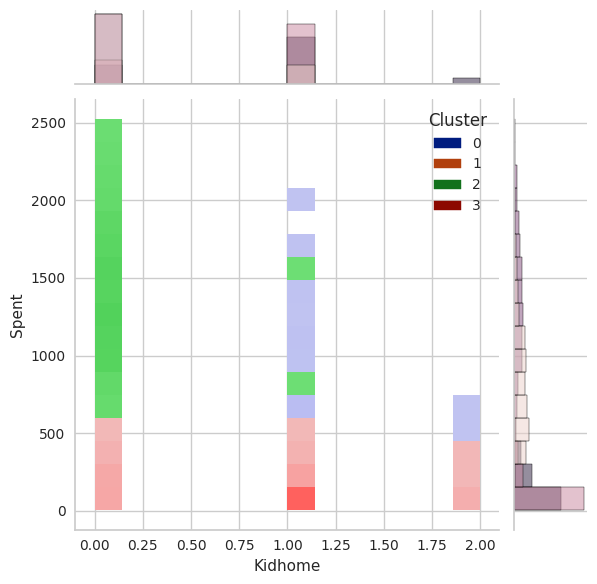

<Figure size 800x550 with 0 Axes>

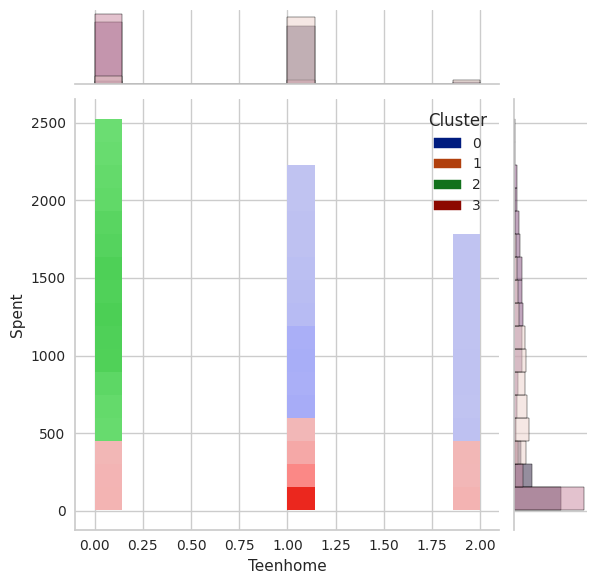

<Figure size 800x550 with 0 Axes>

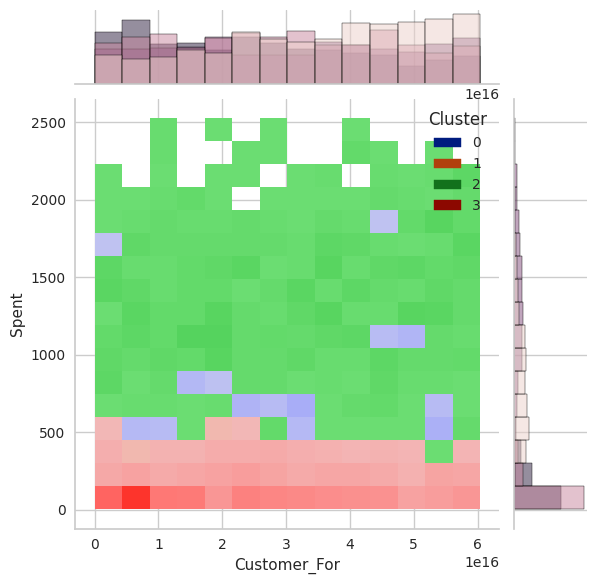

<Figure size 800x550 with 0 Axes>

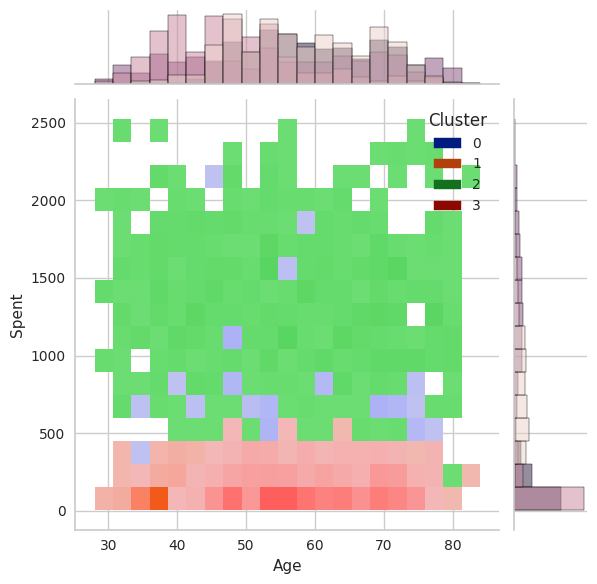

<Figure size 800x550 with 0 Axes>

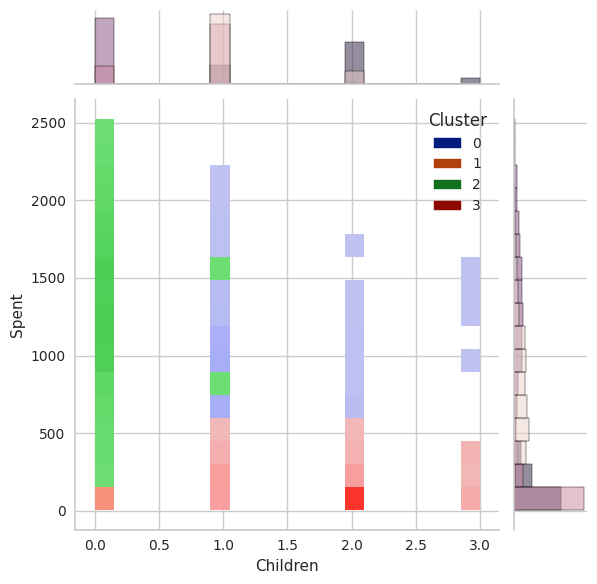

<Figure size 800x550 with 0 Axes>

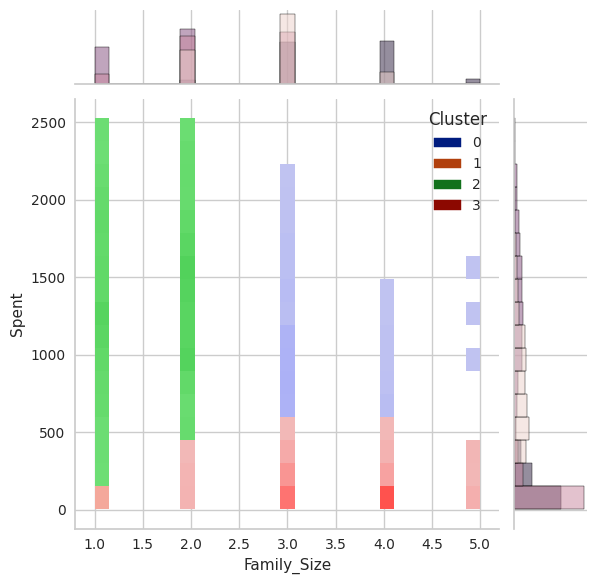

<Figure size 800x550 with 0 Axes>

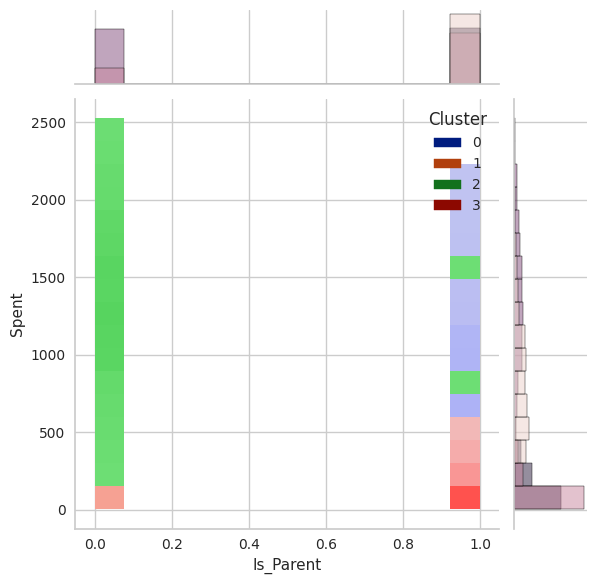

<Figure size 800x550 with 0 Axes>

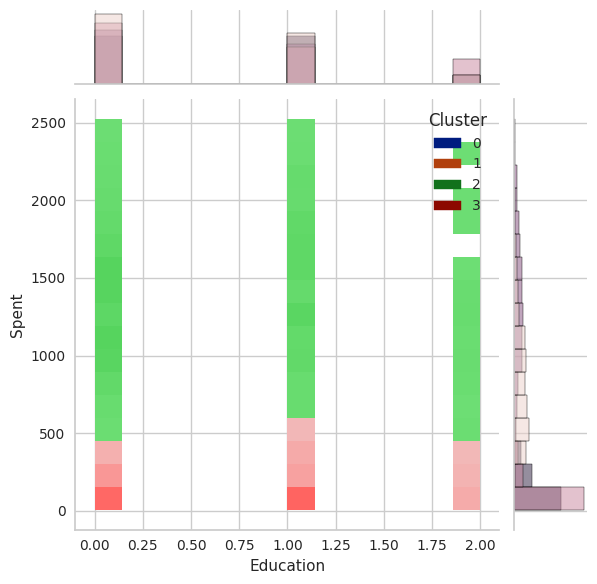

<Figure size 800x550 with 0 Axes>

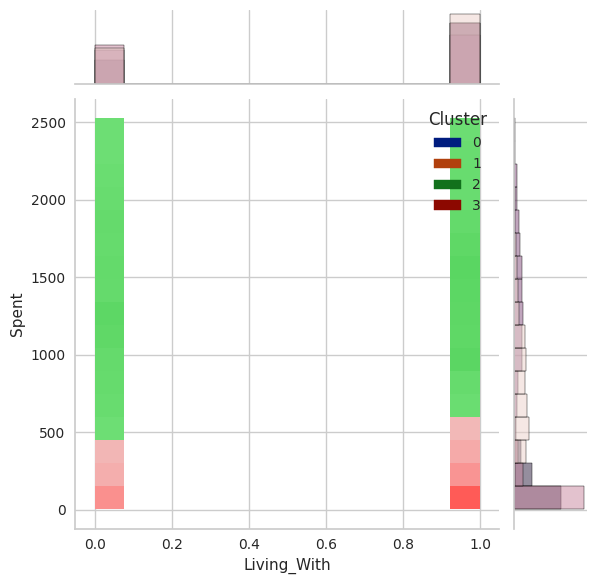

In [51]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i],y=df['Spent'],hue=df['Cluster'],kind='hist',palette='dark')
    plt.show()